# In this tutorial we will talk about basics of data mining

## Cluster analysis
## Classification and regression
## Logistic regression, k-nn classifier, and svm
## Association and correlation
### Outlier
### Detection outliers in univariate, multivariate, and high dimensional spaces
## Dimensionality reduction

## Section 2.1 Cluster analysis

In [216]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [66]:
df = pd.read_csv('single_family_home_values.csv')  #got this from zillow

In [67]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [69]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [70]:
X = df.drop('estimated_value', axis=1)  #have to use axis to drop an entire column possibly could work with inplace, before was using inline whihc is no longer supported.

In [71]:
type(X)

pandas.core.frame.DataFrame

In [72]:
X=X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'priorSaleAmount']]

In [73]:
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,NaN


In [74]:
X.fillna(0, inplace=True)

In [75]:
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0


In [76]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [77]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [78]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [79]:
kmeans.labels_

array([1, 1, 1, ..., 0, 4, 0], dtype=int32)

In [80]:
len(kmeans.labels_)

15000

In [81]:
len(kmeans.labels_), X.shape

(15000, (15000, 7))

In [82]:
kmeans.cluster_centers_

array([[3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
        6.97174968e+03, 1.94200506e+03, 7.43586930e+05],
       [2.64078392e+00, 1.93525180e+00, 5.86293724e+00, 1.39300918e+03,
        5.94409712e+03, 1.93060060e+03, 3.93563157e+04],
       [3.00000000e+00, 4.50000000e+00, 9.00000000e+00, 3.74800000e+03,
        8.59750000e+03, 1.99800000e+03, 1.37500550e+07],
       [3.73118280e+00, 5.64516129e+00, 1.04408602e+01, 4.51996774e+03,
        1.30122688e+04, 1.96766667e+03, 2.37729552e+06],
       [2.70373430e+00, 2.27247191e+00, 6.20290813e+00, 1.47484848e+03,
        5.39461203e+03, 1.92551404e+03, 2.93157062e+05]])

In [83]:
labels = kmeans.labels_

In [84]:
kmeans.cluster_centers_.shape

(5, 7)

In [85]:
kmeans.cluster_centers_[0]

array([3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
       6.97174968e+03, 1.94200506e+03, 7.43586930e+05])

In [86]:
X['cluster'] = labels

In [87]:
X.head(2)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount,cluster
0,3,2.0,6,1378,9968,2003.0,165700.0,1
1,2,2.0,6,1653,6970,2004.0,0.0,1


In [88]:
X.groupby('cluster').mean()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,3.312263,3.839444,8.427307,2697.206068,6971.749684,1942.005057,7.435869e+05
1,2.641226,1.935344,5.863614,1393.248821,5944.416232,1930.599901,3.929321e+04
2,3.000000,4.500000,9.000000,3748.000000,8597.500000,1998.000000,1.375006e+07
3,3.731183,5.645161,10.440860,4519.967742,13012.268817,1967.666667,2.377296e+06
4,2.703104,2.272127,6.201783,1474.475561,5394.550363,1925.518329,2.930734e+05


In [89]:
X.groupby('cluster').min()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,0,0.0,0,662,1626,1879.0,519000.0
1,0,0.0,0,350,278,0.0,0.0
2,3,4.0,8,3355,3916,1994.0,11500110.0
3,1,1.0,4,772,4078,1887.0,1580000.0
4,1,0.0,0,517,1175,1874.0,166331.0


In [90]:
X.groupby('cluster').max()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,13,12.0,39,8456,30200,2016.0,1550000.0
1,9,9.0,22,10907,122839,2016.0,166200.0
2,3,5.0,10,4141,13279,2002.0,16000000.0
3,15,9.0,20,9394,97125,2016.0,5000000.0
4,10,11.0,21,7004,23700,2016.0,518000.0


In [91]:
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,3.0,4.0,8.0,2582.0,6250.0,1927.0,651500.0
1,2.0,2.0,5.0,1133.0,6236.5,1928.5,0.0
2,3.0,4.5,9.0,3748.0,8597.5,1998.0,13750055.0
3,4.0,6.0,10.0,4424.0,8580.0,1989.0,2200000.0
4,3.0,2.0,6.0,1327.0,5210.0,1923.0,279900.0


In [92]:
from sklearn.metrics import silhouette_score

In [93]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print(silhouette_score(X, labels))
    #print kmeans.cluster_centers_

0.6145595723146733
0.6167459027449775
0.6336594067956776
0.6438471925407108
0.6591842038711347
0.6609409183543026
0.6571965299947141


In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

In [94]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [95]:
kmeans.cluster_centers_

array([[2.69687964e+00, 2.15446441e+00, 6.11245441e+00, 1.48069033e+03,
        5.75841841e+03, 1.92881919e+03, 1.72733386e+05, 2.18033230e+00],
       [3.58762887e+00, 5.29381443e+00, 1.01082474e+01, 4.09518041e+03,
        1.05791237e+04, 1.97284021e+03, 1.91109532e+06, 1.45876289e+00]])

## Section-2.2 Classification and regression

In [272]:
X=X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'priorSaleAmount']]

In [273]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.cross_validation import train_test_split  #added after the fact
from sklearn.model_selection import train_test_split  #this is the new way to do it with model_selection
from sklearn.metrics import confusion_matrix #required for confusion matrix, the way it was done before no longer works

In [274]:
X.head(2)          #this will not work in numpy, but it will work in pandas

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0


In [275]:
X

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,0.0
14996,3,3.0,11,2937,4500,1890.0,557500.0
14997,3,5.0,7,2937,4680,2007.0,1208214.0
14998,3,4.0,10,3193,4970,2005.0,405000.0


In [ ]:
head = 5  #used for numpy, do not use the dataset above for remainder of example

In [ ]:
X[:head]  #same as above

In [276]:
y=df.estimated_value      #no known outcome

In [277]:
y

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   address               15000 non-null  object 
 2   city                  15000 non-null  object 
 3   state                 15000 non-null  object 
 4   zipcode               15000 non-null  int64  
 5   latitude              14985 non-null  float64
 6   longitude             14985 non-null  float64
 7   bedrooms              15000 non-null  int64  
 8   bathrooms             15000 non-null  float64
 9   rooms                 15000 non-null  int64  
 10  squareFootage         15000 non-null  int64  
 11  lotSize               15000 non-null  int64  
 12  yearBuilt             14999 non-null  float64
 13  lastSaleDate          15000 non-null  object 
 14  lastSaleAmount        15000 non-null  int64  
 15  priorSaleDate      

In [279]:
lg = LinearRegression()
lg.fit(X,y)   #training, fit
lg.score(X,y) #evaluate, score, R^2

0.7648477834199695

In [280]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [281]:
X_train.shape, y_train.shape

((11250, 7), (11250,))

In [282]:
lg = LinearRegression()
lg.fit(X_train,y_train)  #training, fit
lg.score(X_test,y_test) #evaluate, score

0.7534314969367406

In [283]:
df['estimated_value_bins']=df.estimated_value.apply(lambda x: 'high' if x>500000 else 'low')

In [284]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,estimated_value_bins
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,low
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,low


In [285]:
df.estimated_value_bins.value_counts()

high    7963
low     7037
Name: estimated_value_bins, dtype: int64

In [286]:
df.estimated_value.hist #provides the numbers, requires () to plot the graph

<bound method hist_series of 0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64>

<AxesSubplot:>

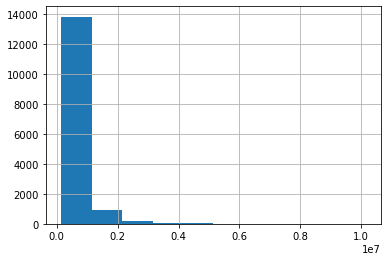

In [287]:
df.estimated_value.hist()

<AxesSubplot:>

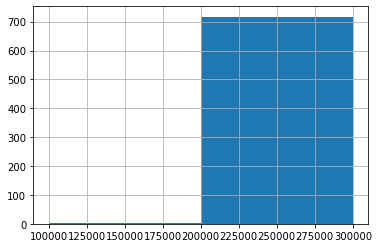

In [288]:
df.estimated_value.hist(bins=[100000, 200000, 300000]) # user can make their own bins

In [289]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,estimated_value_bins
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,low
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,low
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840,low
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,low
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,high
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,low
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,high
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,low
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079,low
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,low


In [290]:
y2 = df.estimated_value_bins

In [291]:
log = LogisticRegression()

In [292]:
X_train, X_test, y2_train, y2_test = train_test_split(X,y2)

In [293]:
log.fit(X_train, y2_train)

LogisticRegression()

In [294]:
log.score(X_test, y2_test)

0.8272

In [295]:
log.predict(X_test)

array(['low', 'high', 'high', ..., 'high', 'high', 'low'], dtype=object)

In [296]:
y_pred = log.predict(X_test)

In [297]:
log.predict(X_test), y2_test

(array(['low', 'high', 'high', ..., 'high', 'high', 'low'], dtype=object),
 11372     low
 8421     high
 4746     high
 11080     low
 6219      low
          ... 
 8510      low
 11786     low
 6747     high
 3696     high
 9018     high
 Name: estimated_value_bins, Length: 3750, dtype: object)

In [298]:
np.array(y2_test)

array(['low', 'high', 'high', ..., 'high', 'high', 'high'], dtype=object)

In [299]:
confusion_matrix(y2_test, y_pred)

array([[1602,  370],
       [ 278, 1500]])

In [300]:
from IPython.display import Image

In [301]:
Image('svm.png')

FileNotFoundError: No such file or directory: 'svm.png'

FileNotFoundError: No such file or directory: 'svm.png'

<IPython.core.display.Image object>

In [302]:
svr = SVR()   #initialize variable
svr.fit(X_train, y_train)  #algorithm is known to have a very long runtime
svr.score(X_test, y_test)

-0.056583993441503555

In [303]:
svc = SVC()   #initialize variable #the classifier trying to predict a catergorical value
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.7146666666666667

In [304]:
y2_pred=svc.predict(X_test)

In [305]:
confusion_matrix(y2_test, y2_pred)

array([[1043,  929],
       [ 141, 1637]])

       high  type1 error
 pred. type2 errror low

## KNN :

xxxxxx
unknown=x
xxxxxx

    oooooo
    unknown=o
    oooooo

In [306]:
from sklearn.neighbors import KNeighborsRegressor

In [307]:
knn=KNeighborsRegressor()

In [308]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [309]:
knn.score(X_test,y_test)

-0.19709053752722294

In [310]:
knc=KNeighborsClassifier()

In [311]:
knc.fit(X_train, y2_train)

KNeighborsClassifier()

In [312]:
knc.score(X_test, y2_test)

0.8424

In [313]:
y2_pred=knc.predict(X_test)

In [314]:
confusion_matrix(y2_test,y2_pred)

array([[1647,  325],
       [ 266, 1512]])

## Section 2.3 Association and correlation

In [315]:
X=X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'priorSaleAmount']]

In [316]:
df.corr() #look at the correlation, its a score matrix of all numerical fields
          #correlation will range from -1 to 1

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,1.000000,-0.007972,-0.092638,0.039591,0.076366,0.128491,0.094063,0.143069,0.045336,0.041342,0.069275,0.012363,0.126193
zipcode,-0.007972,1.000000,0.461953,0.394500,-0.018420,-0.007543,0.031346,0.000812,-0.037696,-0.174142,0.032898,0.033123,0.089104
latitude,-0.092638,0.461953,1.000000,0.499432,-0.083083,-0.237716,-0.213634,-0.256475,-0.092881,-0.105518,-0.126800,-0.225513,-0.266116
longitude,0.039591,0.394500,0.499432,1.000000,0.022375,0.107666,0.026108,0.067845,0.066228,0.060827,0.036747,0.097487,0.121984
bedrooms,0.076366,-0.018420,-0.083083,0.022375,1.000000,0.505931,0.712343,0.620965,0.158497,-0.061681,0.135036,0.211982,0.369125
bathrooms,0.128491,-0.007543,-0.237716,0.107666,0.505931,1.000000,0.686296,0.804179,0.259073,0.194597,0.296577,0.453678,0.715926
rooms,0.094063,0.031346,-0.213634,0.026108,0.712343,0.686296,1.000000,0.771194,0.175949,-0.047720,0.230537,0.370929,0.581023
squareFootage,0.143069,0.000812,-0.256475,0.067845,0.620965,0.804179,0.771194,1.000000,0.369244,0.115298,0.334441,0.506272,0.824506
lotSize,0.045336,-0.037696,-0.092881,0.066228,0.158497,0.259073,0.175949,0.369244,1.000000,0.285517,0.193421,0.226043,0.456539
yearBuilt,0.041342,-0.174142,-0.105518,0.060827,-0.061681,0.194597,-0.047720,0.115298,0.285517,1.000000,0.077553,0.113356,0.174430


<AxesSubplot:>

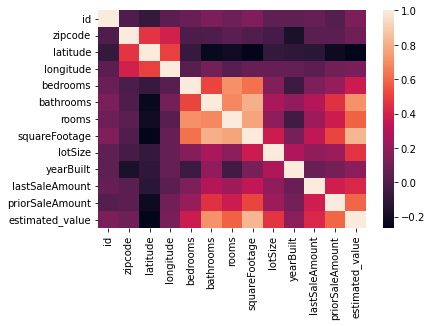

In [317]:
sns.heatmap(df.corr())

In [318]:
df.cov()  #covariance the unstandardized value that can be anything. It captures the variance of 1 feature and another

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,3.832695e+15,-4.794798e+06,-134755.796294,97277.793396,4.241855e+06,9.277448e+06,1.140562e+07,7.357116e+09,8.457335e+09,7.661356e+07,3.326786e+12,2.403030e+11,3.940756e+12
zipcode,-4.794798e+06,9.438634e+01,0.105769,0.152571,-1.605609e-01,-8.546300e-02,5.964580e-01,6.549458e+00,-1.103540e+03,-5.065034e+01,2.479246e+05,1.030079e+05,4.366604e+05
latitude,-1.347558e+05,1.057691e-01,0.000555,0.000468,-1.754563e-03,-6.524595e-03,-9.848155e-03,-5.015548e+00,-6.593470e+00,-7.428908e-02,-2.317704e+03,-1.773170e+03,-3.163364e+03
longitude,9.727779e+04,1.525709e-01,0.000468,0.001583,7.981594e-04,4.991539e-03,2.032934e-03,2.241057e+00,7.941290e+00,7.233661e-02,1.134553e+03,1.306180e+03,2.449320e+03
bedrooms,4.241855e+06,-1.605609e-01,-0.001755,0.000798,8.050231e-01,5.294167e-01,1.251811e+00,4.627877e+02,4.285138e+02,-1.656479e+00,9.398271e+04,6.326439e+04,1.670586e+05
bathrooms,9.277448e+06,-8.546300e-02,-0.006525,0.004992,5.294167e-01,1.360206e+00,1.567688e+00,7.790507e+02,9.104679e+02,6.793260e+00,2.683082e+05,1.783968e+05,4.211742e+05
rooms,1.140562e+07,5.964580e-01,-0.009848,0.002033,1.251811e+00,1.567688e+00,3.836116e+00,1.254643e+03,1.038417e+03,-2.797016e+00,3.502513e+05,2.430849e+05,5.740237e+05
squareFootage,7.357116e+09,6.549458e+00,-5.015548,2.241057,4.627877e+02,7.790507e+02,1.254643e+03,6.899562e+05,9.241945e+05,2.866840e+03,2.154884e+08,1.377630e+08,3.454582e+08
lotSize,8.457335e+09,-1.103540e+03,-6.593470,7.941290,4.285138e+02,9.104679e+02,1.038417e+03,9.241945e+05,9.079853e+06,2.575406e+04,4.521032e+08,1.919438e+08,6.939180e+08
yearBuilt,7.661356e+07,-5.065034e+01,-0.074289,0.072337,-1.656479e+00,6.793260e+00,-2.797016e+00,2.866840e+03,2.575406e+04,8.962271e+02,1.801012e+06,1.141169e+06,2.634072e+06


In [319]:
X

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,0.0
14996,3,3.0,11,2937,4500,1890.0,557500.0
14997,3,5.0,7,2937,4680,2007.0,1208214.0
14998,3,4.0,10,3193,4970,2005.0,405000.0


In [320]:
y=df.estimated_value

In [321]:
y

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [322]:
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount'],
      dtype='object')

====
bedrooms
mean: 2.7084
std: 0.8972307998543382


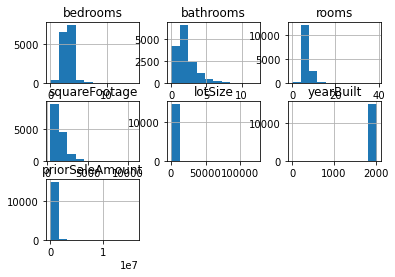

====
bathrooms
mean: 2.1950666666666665
std: 1.1662788442928953


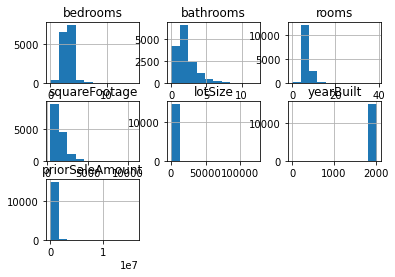

====
rooms
mean: 6.164133333333333
std: 1.958600518215801


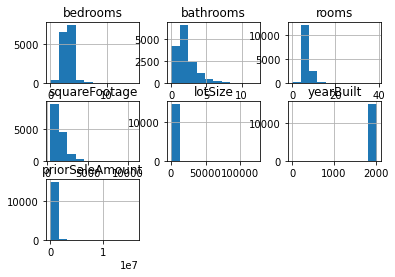

====
squareFootage
mean: 1514.5044
std: 830.6359987331762


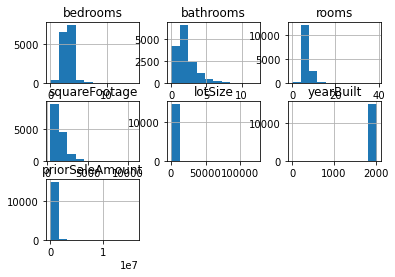

====
lotSize
mean: 5820.7662
std: 3013.279470369183


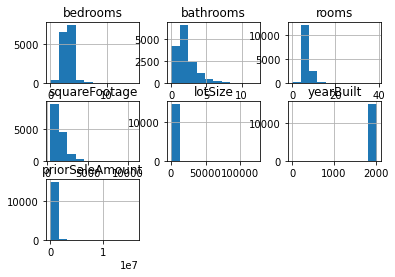

====
yearBuilt
mean: 1929.3885333333333
std: 33.82853430411162


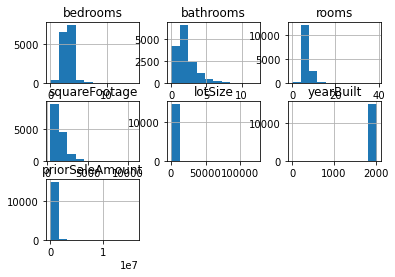

====
priorSaleAmount
mean: 195216.20066666667
std: 313797.90664518543


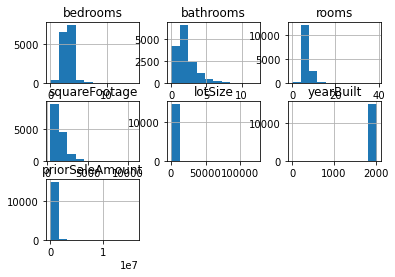

In [323]:
for i in X.columns:
    print('====')
    print(i)
    X.loc[:i].hist()
    print('mean:' ,X.loc[:, i].mean())
    print('std:' ,X.loc[:, i].std())
    plt.show()

In [324]:
X2=X[X.bedrooms<7] #so now there is no datapoint above 7

<AxesSubplot:>

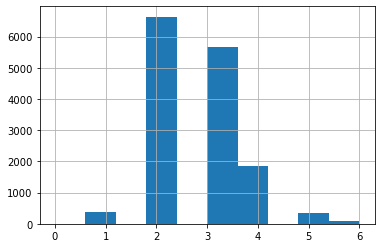

In [325]:
X2.bedrooms.hist()

what if you want to remove 2 things

In [326]:
X2=X[(X.bedrooms<7) & (X.bathrooms<7)]  #drop

<AxesSubplot:>

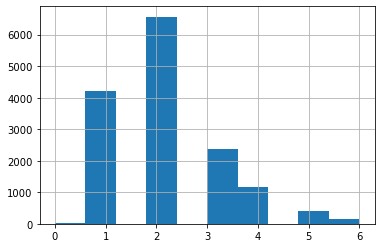

In [327]:
X2.bathrooms.hist()

In [328]:
  #detecting outliers  (linear regression can be distorted by a few outliers)

# Outliers

# 1. Three Sigma Rules

# 2. Boxplot

<AxesSubplot:>

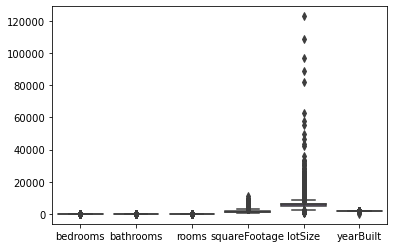

In [329]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt']])  #have to use data variable to display actual data. x and y are the titles of the graph

<AxesSubplot:>

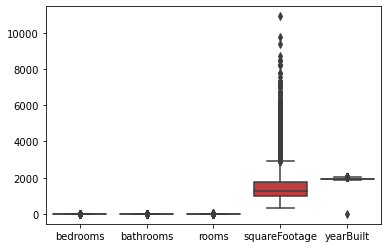

In [330]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'yearBuilt']]) 

<AxesSubplot:>

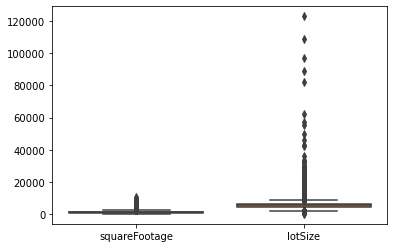

In [354]:
sns.boxplot(data=X[['squareFootage', 'lotSize']]) 

<AxesSubplot:>

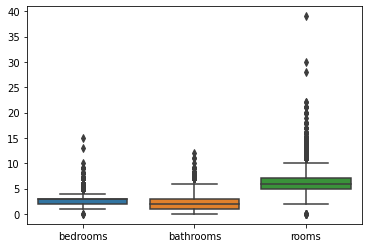

In [355]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms']])

## Section 2.4 Dimensoinality reduction

Curse of dimensionality: "As the number of features of dimensions grows, the amount of data we need to generalize accurately grows exponentially"

In [356]:
from sklearn.decomposition import PCA  #think of PCA as a compressor

In [357]:
pca = PCA(4) #the four is saying we want 4 components, may need to do trials and errors and/or look at elbows.

In [358]:
X

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,0.0
14996,3,3.0,11,2937,4500,1890.0,557500.0
14997,3,5.0,7,2937,4680,2007.0,1208214.0
14998,3,4.0,10,3193,4970,2005.0,405000.0


In [359]:
X.shape

(15000, 7)

In [360]:
X_transformed = pca.fit_transform(X)

In [361]:
X_transformed.shape

(15000, 4)

In [362]:
pca.components_.shape  #this is made up of the original 8 components

(4, 7)

In [363]:
pca.components_[0]  # just looking at the 1 component, these 8 features are contributing to the 1 component

array([4.34835866e-07, 1.39033126e-06, 1.76645671e-06, 9.91884229e-04,
       1.22556479e-03, 8.13159056e-06, 9.99998757e-01])

In [364]:
pca.components_

array([[ 4.34835866e-07,  1.39033126e-06,  1.76645671e-06,
         9.91884229e-04,  1.22556479e-03,  8.13159056e-06,
         9.99998757e-01],
       [ 4.59899754e-05,  8.88602690e-05,  1.02614970e-04,
         9.51591022e-02,  9.95457158e-01,  2.83604230e-03,
        -1.31440908e-03],
       [-7.41279240e-04, -1.10361769e-03, -1.93477104e-03,
        -9.95458475e-01,  9.51576074e-02,  1.08902953e-03,
         8.70755249e-04],
       [ 2.87494377e-03, -3.44585965e-03,  6.23055904e-03,
        -8.24565322e-04,  2.92725018e-03, -9.99965895e-01,
         5.35419321e-06]])

In [365]:
X

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,0.0
14996,3,3.0,11,2937,4500,1890.0,557500.0
14997,3,5.0,7,2937,4680,2007.0,1208214.0
14998,3,4.0,10,3193,4970,2005.0,405000.0


In [366]:
y   #y is estimated value

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [367]:
lg=LinearRegression()

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)

In [369]:
lg.fit(X_train, y_train)

LinearRegression()

In [370]:
lg.score(X_test, y_test)

0.7211987840962268

In [371]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,estimated_value_bins
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,low
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,low
